# **Classification Model: Classify images of clothing**

This neural network model to classify images of clothing, like sneakers and shirts. 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

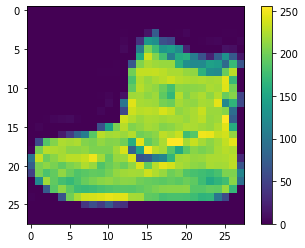

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

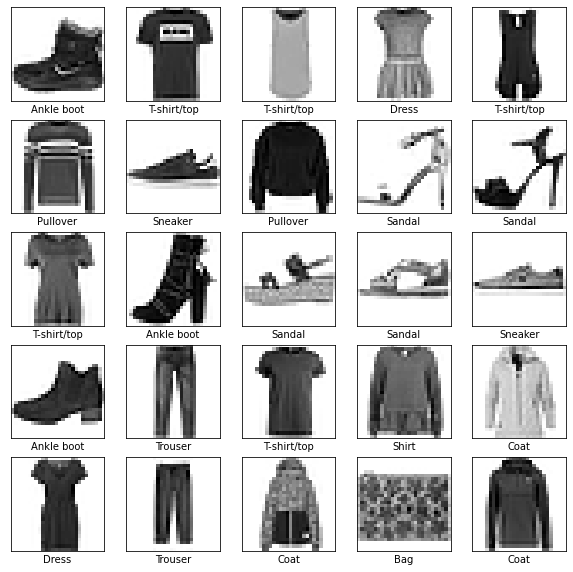

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5036 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3807 - accuracy: 0.8619
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.8989
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2325 - accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2259 - accuracy: 0.9165
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2169 - accuracy: 0.9183
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2098 - accuracy: 0.9214
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2062 - accuracy: 0.9224
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1998 - accuracy: 0.9248
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1963 - accuracy: 0.9261
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1880 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1854 - accuracy: 0.9308
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.178

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3816 - accuracy: 0.8828

Test accuracy: 0.8827999830245972


In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
predictions[0]

array([2.5695743e-09, 3.6502261e-14, 7.2164247e-13, 3.9509349e-13,
       1.1868992e-09, 9.8664600e-07, 4.2582618e-10, 2.6015742e-04,
       5.9415119e-11, 9.9973887e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

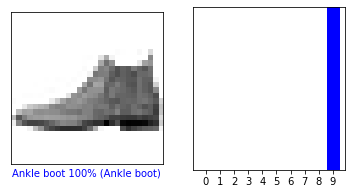

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

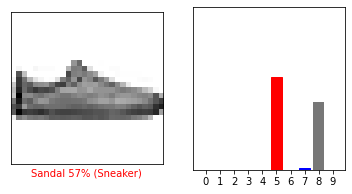

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

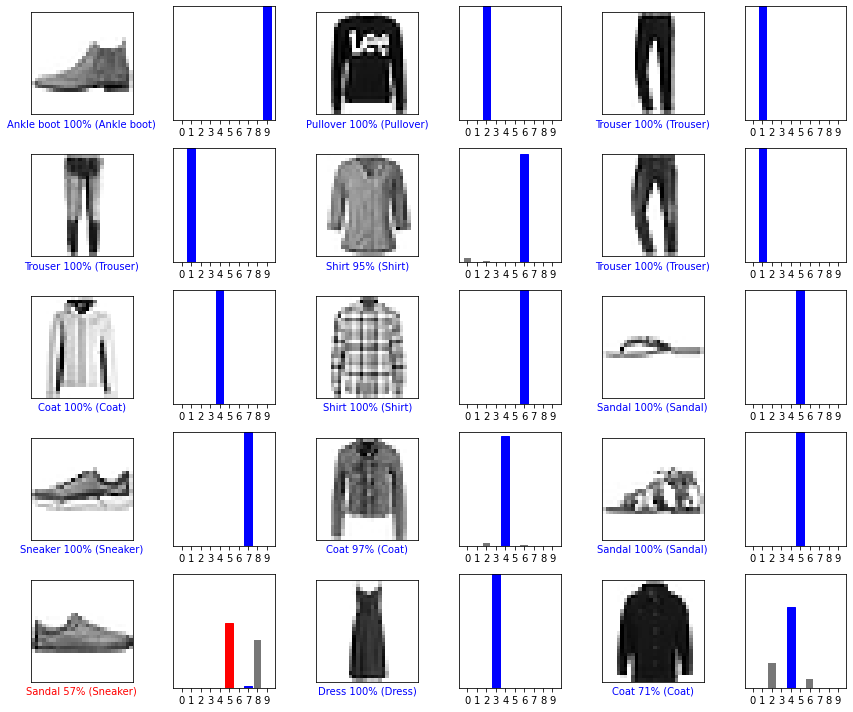

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.6203033e-06 3.7338203e-24 9.9957293e-01 6.0864165e-18 4.2359711e-04
  4.1804010e-14 8.0959529e-07 4.1650798e-22 1.4826180e-13 4.4791632e-21]]


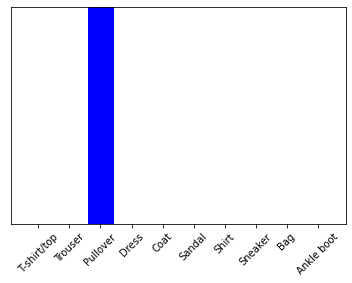

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

2